<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Session 05-2: Linear Regression (Boston House price)</h3>
    <h4 align="center"><a href="http://www.iran-machinelearning.ir">Soheil Tehranipour</a></h5>
        <h4 align="center"><a href="http://www.iran-machinelearning.ir">Modified by Alireza Javid</a></h5>
</div>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<img src="https://miro.medium.com/v2/resize:fit:875/1*XSBSL7LbDOvjXyi4wz-i_g.png" width=75% />

# California House Dataset

<img src="https://thinkingneuron.com/wp-content/uploads/2020/09/Boston-house-price-prediction.png" width=75% />

In [7]:
#imports datasets from scikit-learn
from sklearn import datasets 
#loads Boston dataset from datasets library 
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()



The problem that we are going to solve here is that given a set of features that describe a house in California, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s California dataset.

In this dataset, each row describes a California town or suburb. There are 20640 rows and 8 attributes (features) with a target column (price). https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names


In [10]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [12]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
# Initializing the dataframe
data = pd.DataFrame(california.data, columns=california.feature_names)

In [16]:
# See head of the dataset
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
#Adding target variable to dataframe
data['PRICE'] = california.target 
# Median value of owner-occupied homes in $1000s

In [20]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
#Check the shape of dataframe
data.shape

(20640, 9)

In [24]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [26]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

In [28]:
# Identifying the unique number of values in the dataset
data.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64

In [30]:
# Check for missing values
data.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [32]:
# Check for missing values
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [34]:
# Viewing the data statistics
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<img src="https://4.bp.blogspot.com/-oizUdNg_XMk/WLAfW-f4ShI/AAAAAAAAEAE/hXpnuCzG-8098Ocsv5Vl-V45GNZ_zOv-QCLcB/s400/correlation_coefficient.gif" />


In [37]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(9, 9)

<img src="https://www.datadeck.com/en/blog/wp-content/uploads/2018/11/cor-examples.png" />

In [40]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

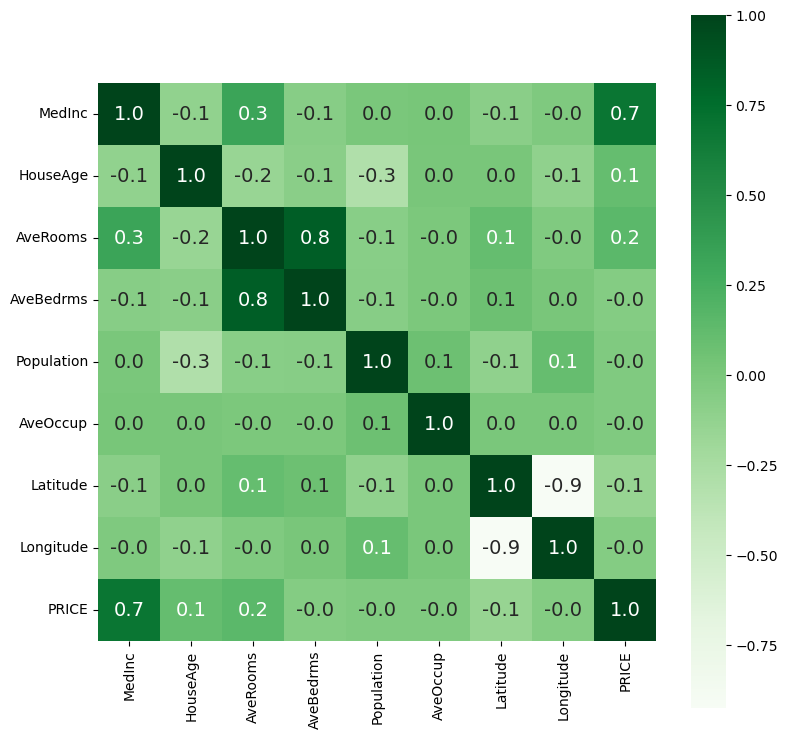

In [50]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(9,9))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':14}, cmap='Greens')

# Simple vs. Multiple Linear Regression

## Simple Linear Regression (SLR)

In [54]:
X = data[['MedInc']]
#X = data["ZN"].values.reshape((-1,1))
y = data['PRICE']

In [56]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [58]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
slr = LinearRegression()

# Train the model using the training sets 
slr.fit(X_train, y_train)

LinearRegression()

In [60]:
slr.intercept_

np.float64(0.45714019819848306)

In [62]:
slr.coef_

array([0.4163053])

In [64]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,slr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,MedInc,0.416305


## Model (SLR) Evaluation

In [67]:
from sklearn import metrics

In [69]:
# Model prediction on train data
y_pred_t = slr.predict(X_train)
y_pred_T = slr.predict(X_test)



𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 


In [72]:
# Model Train Evaluation
print('R^2(train):',metrics.r2_score(y_train, y_pred_t))
print('MAE(train):',metrics.mean_absolute_error(y_train, y_pred_t))
print('MSE(train):',metrics.mean_squared_error(y_train, y_pred_t))
print('RMSE(train):',np.sqrt(metrics.mean_squared_error(y_train, y_pred_t)))

R^2(train): 0.4746858522764793
MAE(train): 0.6283207799297094
MSE(train): 0.7050206811266955
RMSE(train): 0.8396550965287446


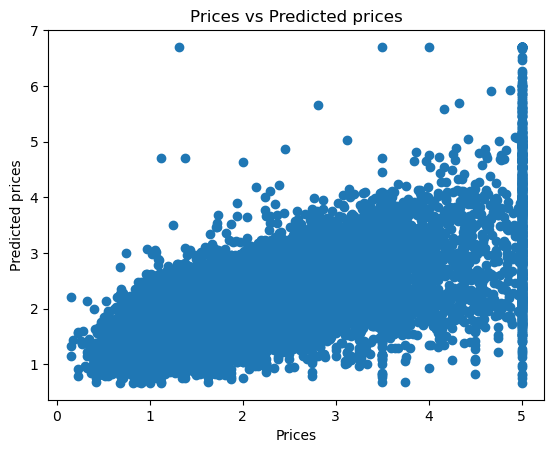

In [74]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred_t)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

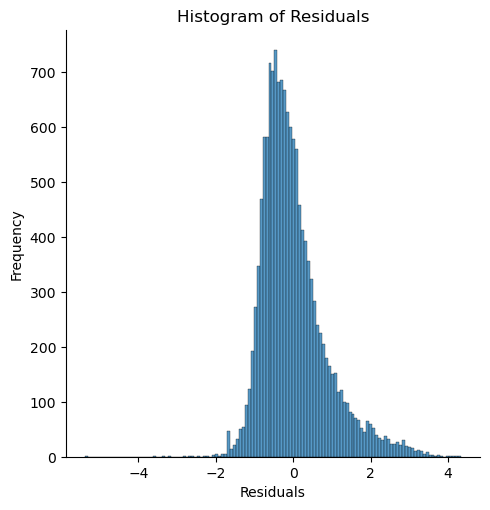

In [76]:
sns.displot(y_train-y_pred_t)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [78]:
# Model Test Evaluation
print('R^2(test):',metrics.r2_score(y_test, y_pred_T))
print('MAE(test):',metrics.mean_absolute_error(y_test, y_pred_T))
print('MSE(test):',metrics.mean_squared_error(y_test, y_pred_T))
print('RMSE(test):',np.sqrt(metrics.mean_squared_error(y_test, y_pred_T)))

R^2(test): 0.4703664156204861
MAE(test): 0.6220831585910722
MSE(test): 0.6920876718986755
RMSE(test): 0.8319180680203282


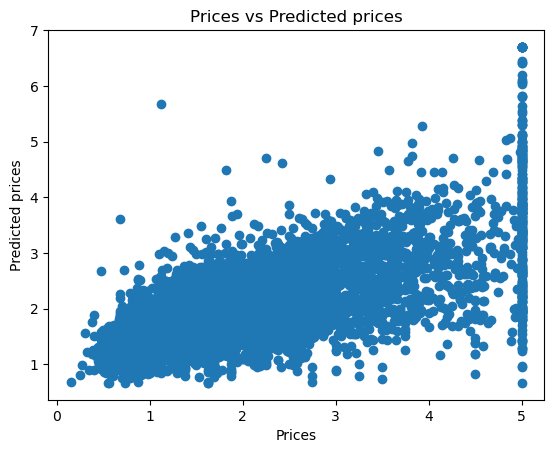

In [80]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_T)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

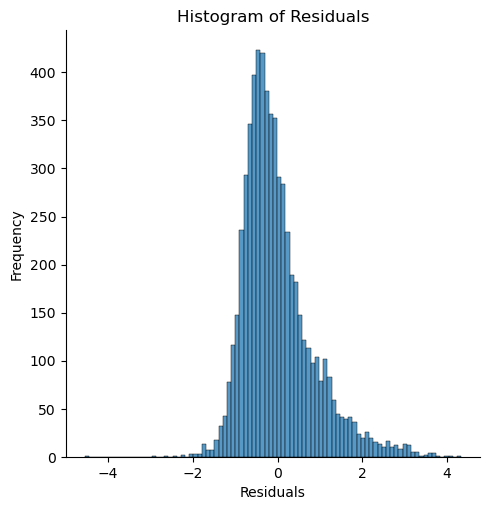

In [82]:
sns.displot(y_test-y_pred_T)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Multiple Linear Regression (MLR)

In [85]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [87]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [89]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [91]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
mlr = LinearRegression()

# Train the model using the training sets 
mlr.fit(X_train, y_train)

LinearRegression()

In [93]:
mlr.intercept_

np.float64(-36.92588429884596)

In [95]:
mlr.coef_

array([ 4.38284149e-01,  9.02141800e-03, -1.13436409e-01,  6.48834993e-01,
       -7.98668870e-06, -3.97828751e-03, -4.21168217e-01, -4.34680482e-01])

In [97]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,MedInc,0.438284
1,HouseAge,0.009021
2,AveRooms,-0.113436
3,AveBedrms,0.648835
4,Population,-0.000008
5,AveOccup,-0.003978
6,Latitude,-0.421168
7,Longitude,-0.43468


## Model(MLR) Evaluation

In [100]:
# Model prediction on train data
y_pred_t = mlr.predict(X_train)
y_pred_T = mlr.predict(X_test)

In [102]:
# Model Train Evaluation
print('R^2(train):',metrics.r2_score(y_train, y_pred_t))
print('MAE(train):',metrics.mean_absolute_error(y_train, y_pred_t))
print('MSE(train):',metrics.mean_squared_error(y_train, y_pred_t))
print('RMSE(train):',np.sqrt(metrics.mean_squared_error(y_train, y_pred_t)))

R^2(train): 0.6081901093734017
MAE(train): 0.5319076620403788
MSE(train): 0.5258454910434389
RMSE(train): 0.7251520468449627


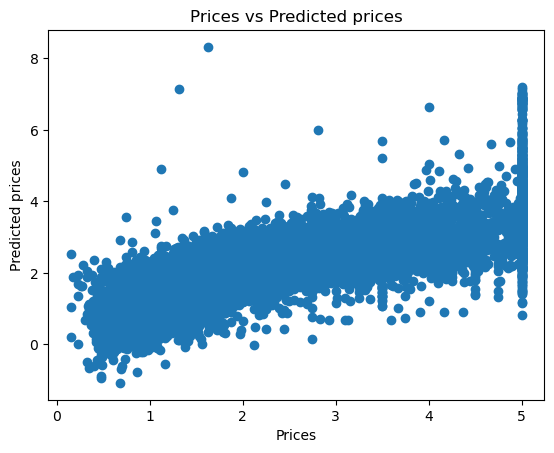

In [104]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred_t)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

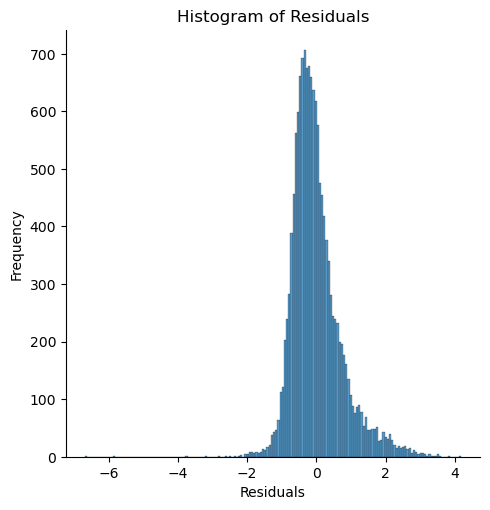

In [106]:
sns.displot(y_train-y_pred_t)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [108]:
# Model Test Evaluation
print('R^2(test):',metrics.r2_score(y_test, y_pred_T))
print('MAE(test):',metrics.mean_absolute_error(y_test, y_pred_T))
print('MSE(test):',metrics.mean_squared_error(y_test, y_pred_T))
print('RMSE(test):',np.sqrt(metrics.mean_squared_error(y_test, y_pred_T)))

R^2(test): 0.6010291338754377
MAE(test): 0.5303872778945679
MSE(test): 0.5213468821374592
RMSE(test): 0.7220435458734183


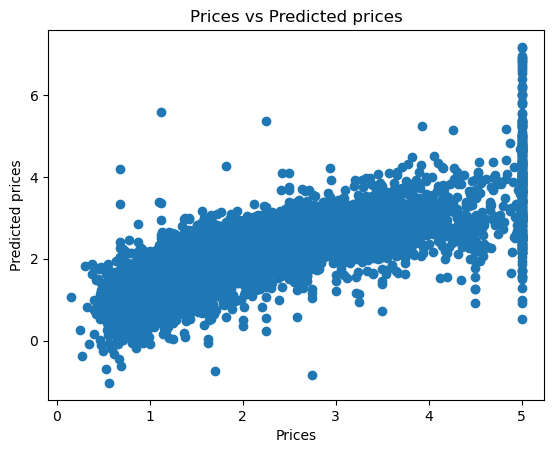

In [110]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_T)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

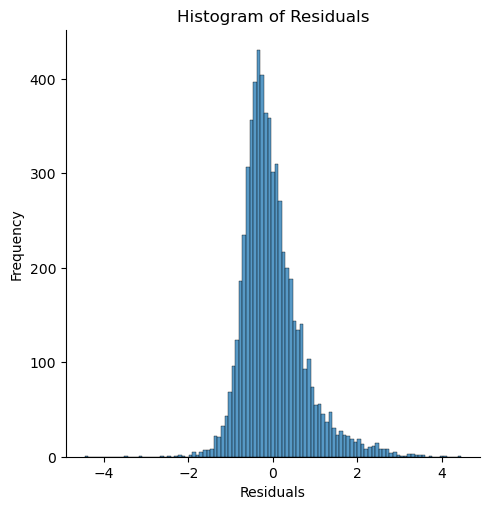

In [112]:
sns.displot(y_test-y_pred_T)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial regression 

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_quadratic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
     
# predicting on training data-set
y_train_predicted = quadratic.predict(X_train_quadratic)
   
# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [119]:
# Model Train Evaluation
print('R^2(train):',metrics.r2_score(y_train, y_train_predicted))
print('MAE(train):',metrics.mean_absolute_error(y_train, y_train_predicted))
print('MSE(train):',metrics.mean_squared_error(y_train, y_train_predicted))
print('RMSE(train):',np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))

R^2(train): 0.6970554355139229
MAE(train): 0.4513097826911712
MSE(train): 0.40657991817501
RMSE(train): 0.637636195784877


In [121]:
# Model Test Evaluation
print('R^2(test):',metrics.r2_score(y_test, y_test_predicted))
print('MAE(test):',metrics.mean_absolute_error(y_test, y_test_predicted))
print('MSE(test):',metrics.mean_squared_error(y_test, y_test_predicted))
print('RMSE(test):',np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

R^2(test): 0.4799914991810408
MAE(test): 0.46629006949760815
MSE(test): 0.6795102941233241
RMSE(test): 0.8243241438435029


In [123]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=3)
   
# transform the features to higher degree features.
X_train_cubic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
cubic = LinearRegression()

cubic.fit(X_train_cubic, y_train)
     
# predicting on training data-set
y_train_predicted = cubic.predict(X_train_cubic)
   
# predicting on test data-set
y_test_predicted = cubic.predict(poly_features.fit_transform(X_test))

In [125]:
metrics.r2_score(y_train, y_train_predicted)

0.736119535001882

In [127]:
metrics.r2_score(y_test, y_test_predicted)

-714.8280140947849